<a href="https://colab.research.google.com/github/Amitkumardas123/Personalized-Healthcare-Recommendations/blob/main/Personalized_Healthcare_Recommendations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Personalized Healthcare Recommendations

##### **Contribution**    - Individual
##### **Name**            - Amit Kumar Das

# **Project Summary -**

The Personalized Healthcare Recommendations System project aims to leverage machine learning to provide tailored healthcare advice based on individual patient data. By analyzing a diverse range of factors, including demographic information, medical history, lifestyle choices, biometric data, and lab results, the system seeks to improve patient outcomes through data-driven, actionable insights.

# **Key Objectives:**

***1.Develop a Predictive Model:***

Utilize advanced machine learning algorithms to predict health outcomes and suggest personalized recommendations for patients.

***2.Enhance Patient Care:***

 Offer individualized advice on lifestyle changes, preventive measures, and treatment plans, ultimately aiming to improve overall health and well-being.

***3.Data Integration:***

Aggregate and process data from multiple sources, including electronic health records (EHRs), wearable devices, and patient surveys, to build a comprehensive patient profile.

# **Methodology:**

***1.Dataset Preparation:***

 Collect and preprocess patient data from various sources, ensuring it is clean, normalized, and ready for analysis. Features considered include age, gender, blood pressure, heart rate, diet, exercise habits, and more.

***2.Exploratory Data Analysis (EDA):***

 Conduct in-depth exploration using statistical methods and visualization techniques to identify patterns, correlations, and potential predictive factors within the data.

***3.Feature Engineering:***

 Develop new features and select the most relevant ones to enhance model accuracy and interpretability, focusing on creating health indices and composite scores that better represent patient conditions.

***4.Model Selection and Training:***

 Experiment with various machine learning models, such as Logistic Regression, Random Forest, Gradient Boosting Machines, Support Vector Machines (SVM), and Neural Networks. Train and validate these models to identify the best performer based on accuracy, precision, recall, F1-score, and ROC-AUC.

***5.Model Evaluation:***

 Rigorously evaluate the selected model using cross-validation and test datasets. Visualize performance through confusion matrices and ROC curves to ensure the model's reliability and effectiveness.

***6.Recommendation System Implementation:***

 Develop an algorithm that translates model predictions into personalized healthcare recommendations. The system is designed to be interpretable and actionable, ensuring that both healthcare professionals and patients can easily understand and apply the advice provided.

***7.Deployment and Monitoring:***

Implement the system in a user-friendly interface or API, allowing seamless integration into healthcare workflows. Continuously monitor the system's performance, updating the model as new data becomes available to maintain accuracy and relevance.

# **Outcomes:**

The Personalized Healthcare Recommendations System is expected to significantly enhance patient care by providing targeted advice that is specifically tailored to each individual's unique health profile. This data-driven approach aims to support healthcare providers in making informed decisions, ultimately leading to better patient outcomes, reduced healthcare costs, and a more personalized approach to medicine.

This project aligns with the broader goal of advancing precision medicine, using cutting-edge technology to tailor healthcare to individual needs, thus paving the way for more effective and efficient patient care.

# **GitHub Link -**

# ***Let's Begin !***

In [2]:
# Import Libraries

# libraries that are used for data read,analysis and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# libraries to do statistical analysis
import math
from scipy.stats import *

# libraries used to pre-process
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from statsmodels.stats.outliers_influence import variance_inflation_factor
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# libraries used to implement models
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# libraries to evaluate performance
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, confusion_matrix
from sklearn.metrics import precision_score, f1_score, recall_score
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

# library of warnings would assist in ignoring warnings issued
import warnings
warnings.filterwarnings("ignore")

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [2]:
# Load Dataset

Data = pd.read_csv("/content/drive/MyDrive/Unified mentor projects/MY PROJECT/Personalized Healthcare Recommendations/blood.csv")

In [3]:
# Dataset First Look
# Viewing the first 5 rows of the datset

Data.head()

,Recency,Frequency,Monetary,Time,Class
0,2,50,12500,99,1
1,0,13,3250,28,1
2,1,17,4000,36,1
3,2,20,5000,45,1
4,1,24,6000,77,0


In [4]:
# Dataset Rows & Columns count

print(f'number of rows : {Data.shape[0]}  \nnumber of columns : {Data.shape[1]}')

number of rows : 748  
number of columns : 5


# **Know Your Features/Variable**

    Recency: The number of months since the last donation.

    Frequency: The total number of donations made by an individual.

    Monetary: The amount of blood donated (possibly in milliliters or a monetary value associated with the donations).

    Time: The total time (likely in months) since the first donation.

    Class: The target variable, indicating whether the individual is likely to donate blood again (1) or not (0).

#### Duplicate Values

In [5]:
# Dataset Duplicate Value Count

dup = len(Data[Data.duplicated()])
print(f'The number of duplicate value in the dataset is {dup}')

The number of duplicate value in the dataset is 215


In [6]:
# Remove Duplicate Value in Dataset

Data.drop_duplicates(inplace = True)

In [7]:
# Again Count Dataset Duplicate Value

dup = len(Data[Data.duplicated()])
print(f'The number of duplicate value in the dataset is {dup}')

The number of duplicate value in the dataset is 0


### Dataset Information

In [8]:
# Checking the datatype of each features

Data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 533 entries, 0 to 747
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Recency    533 non-null    int64
 1   Frequency  533 non-null    int64
 2   Monetary   533 non-null    int64
 3   Time       533 non-null    int64
 4   Class      533 non-null    int64
dtypes: int64(5)
memory usage: 25.0 KB


**Our Target Variable is in integer format so we need to convert into categorical format.**

In [9]:
# Ensure the 'Class' column is treated as a categorical variable
Data['Class'] = Data['Class'].astype('category')

In [10]:
# Again Checking the datatype of each features

Data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 533 entries, 0 to 747
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   Recency    533 non-null    int64   
 1   Frequency  533 non-null    int64   
 2   Monetary   533 non-null    int64   
 3   Time       533 non-null    int64   
 4   Class      533 non-null    category
dtypes: category(1), int64(4)
memory usage: 21.5 KB


In [11]:
# Counting The non null value present in our dataset

Data.isnull().sum()

,0
Recency,0
Frequency,0
Monetary,0
Time,0
Class,0


In [12]:
# Describe  the  features of dataset

Data.describe()

,Recency,Frequency,Monetary,Time
count,533.000000,533.000000,533.000000,533.000000
mean,9.529081,6.992495,1747.654784,42.307692
std,8.250860,6.268727,1566.468760,23.299276
min,0.000000,1.000000,250.000000,2.000000
25%,3.000000,3.000000,750.000000,26.000000
50%,8.000000,5.000000,1250.000000,38.000000
75%,14.000000,9.000000,2250.000000,58.000000
max,74.000000,50.000000,12500.000000,99.000000


**Its look like our dataset is neat & clean.so we can go with our analysis.**


# **Looking the distribution of independent features.**

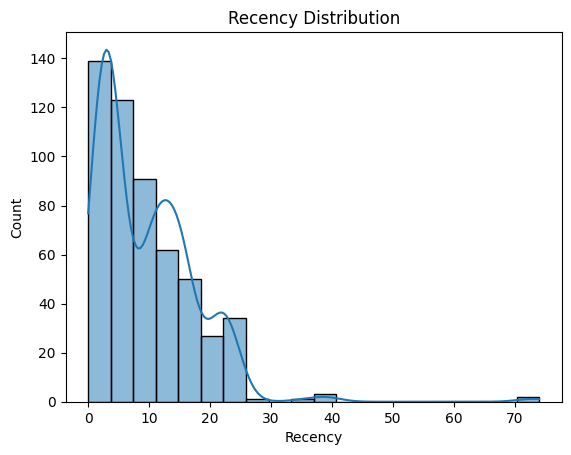

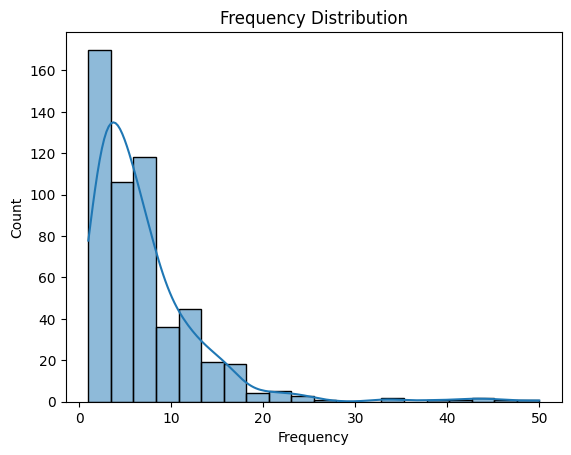

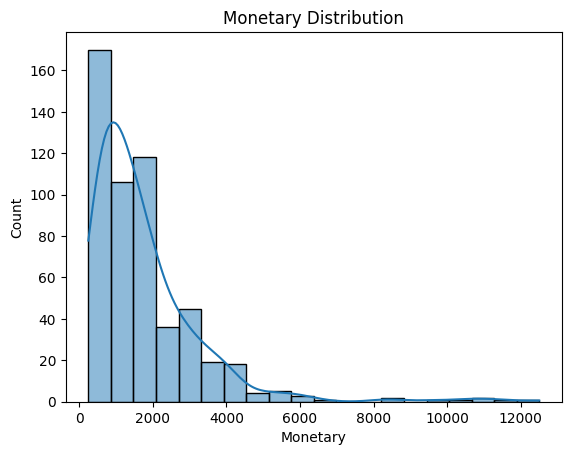

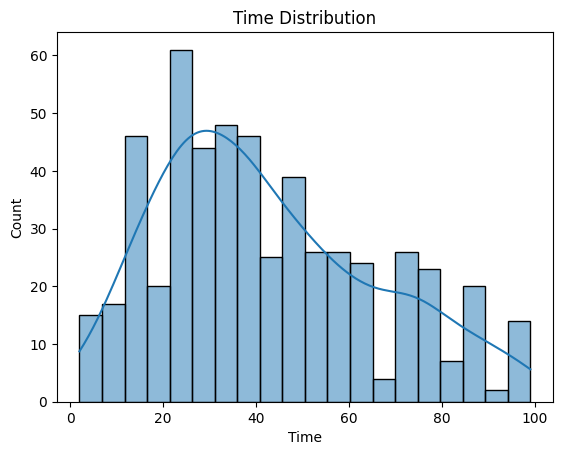

In [14]:
# Distribution of key features

sns.histplot(Data['Recency'], bins=20, kde=True)
plt.title('Recency Distribution')
plt.show()

sns.histplot(Data['Frequency'], bins=20, kde=True)
plt.title('Frequency Distribution')
plt.show()

sns.histplot(Data['Monetary'], bins=20, kde=True)
plt.title('Monetary Distribution')
plt.show()

sns.histplot(Data['Time'], bins=20, kde=True)
plt.title('Time Distribution')
plt.show()


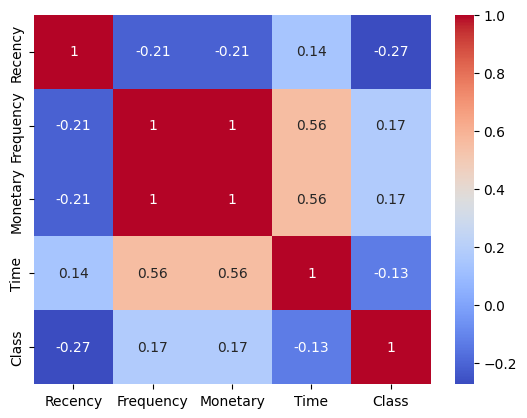

In [15]:
# Correlation matrix to see relationships between variables

corr_matrix = Data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

Here we can see that Frequency and monetary features are strongly correlated (Independent features should be independent)with each other.so we make a new feature combinig this two features.

In [1]:
# Creating a new feature combining Monetary and Frequency
Data['Frequency_Monetary'] = Data['Monetary'] * Data['Frequency']

NameError: name 'Data' is not defined

#Checking For class imbalance

In [ ]:
Data['Class'].value_counts()

,count
Class,
0,384
1,149


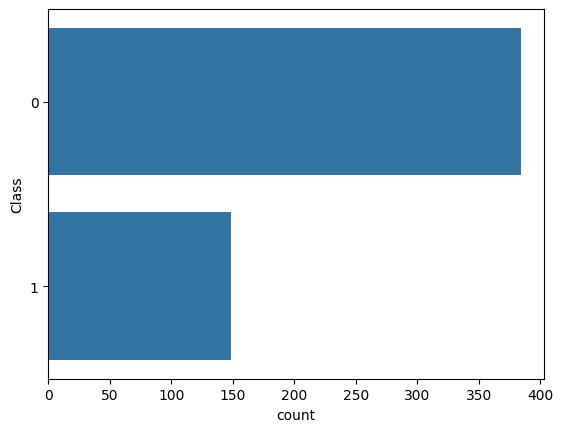

In [ ]:
# visualize the target variable

g = sns.countplot(Data['Class'])
plt.show()

Here if we tarin the model with this datset then One of the major issues when dealing with unbalanced datasets relates to the metrics used to evaluate their model. Using simpler metrics like accuracy score can be misleading. In a dataset with highly unbalanced classes, the classifier will always “predict” the most common class without performing any analysis of the features and it will have a high accuracy rate, obviously not the correct one.

**Here we use SMOTE( Synthetic Minority Oversampling Technique) Technique for dealing with imbalnced Dataset.**

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(Data.iloc[:,0:-1], Data['Class'])

print('Original dataset shape', len(Data))
print('Resampled dataset shape', len(y_smote))

Original dataset shape 533
Resampled dataset shape 768
